The project is designed for predicting whether e-mail is spam or not. Firstly, data will be preprocessed and formatted in order for libraries to effectively calculate the class of an e-mail.

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In the beginning, exploratory data analysis must be done.

In [382]:
df = pd.read_csv("spam.csv", encoding="latin-1").rename(columns={"v1": "Class", "v2": "Message"})
df = df.iloc[:, 0:2]
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [214]:
df.describe()

,Class,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


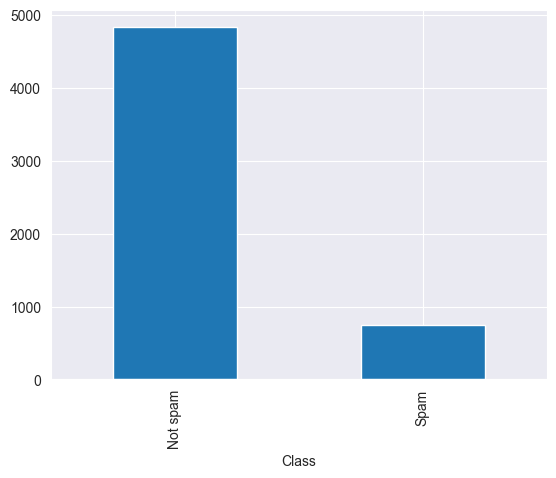

In [358]:
class_names = {"ham": "Not spam", "spam": "Spam"}
temp = df.value_counts("Class").rename(index=class_names).plot(kind="bar")

In [384]:
from statistics import mean


email_len_spam = round(mean([len(i) for i in df.loc[df["Class"] == "spam"]["Message"]]))
email_len_ham = round(mean([len(i) for i in df.loc[df["Class"] == "ham"]["Message"]]))

71

With the preprocessed data it is time to start preparing our dataset for a prediction model.

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [224]:
x = df['Message']
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [228]:
v = CountVectorizer()
features = v.fit_transform(X_train)

<4457x7721 sparse matrix of type '<class 'numpy.int64'>'
	with 58959 stored elements in Compressed Sparse Row format>

In [229]:
model = MultinomialNB()
model.fit(features, y_train)

MultinomialNB()

In [230]:
features_test = v.transform(X_test)
print("Accuracy: {}".format(model.score(features_test, y_test)))

Accuracy: 0.9838565022421525
